In [1]:
import pandas as pd
import numpy as np

## Standardising Data

In [2]:
# Function for standardising and unstandardising columns
def standardise_columns(df, cols):
    subset_df = df[cols]
    subset_df = 0.8 * ((subset_df - subset_df.min()) / (subset_df.max() - subset_df.min())) + 0.1
    return subset_df

def unstandardise_columns(df, cols, max_val, min_val):
    subset_df = df[cols]
    subset_df = ((subset_df - subset_df.min()) / 0.8) * (max_val - min_val) + min_val
    return subset_df

def standardise_value(x, max_val, min_val):
    return 0.8 * ((x - min_val)) / (max_val - min_val) + 0.1

def unstandardise_value(x, max_val, min_val):
    return ((x - 0.1) / 0.8) * (max_val - min_val) + min_val

## Reading Data

In [3]:
my_data = pd.read_excel("River-Data-Lagged.xlsx")
my_data.drop(["Unnamed: 0"], axis=1, inplace=True)
my_data.head(10)

,Date,Skelton MDF (Cumecs),Crakehill MDF (t-1),Skip Bridge MDF (t-1),Westwick MDF (t-1),Skelton MDF (t-1),Crakehill MDF (t-2),Skip Bridge MDF (t-2),Westwick MDF (t-2),Skelton MDF (t-2),...,Malham Tarn DRT (t-1),Snaizeholme DRT (t-1),Arkengarthdale DRT (t-2),East Cowton DRT (t-2),Malham Tarn DRT (t-2),Snaizeholme DRT (t-2),Arkengarthdale DRT (t-3),East Cowton DRT (t-3),Malham Tarn DRT (t-3),Snaizeholme DRT (t-3)
0,1993-01-04,23.47,9.46,4.124,8.057,23.60,9.95,4.239,8.622,24.86,...,0.8,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,4.0
1,1993-01-05,60.70,9.41,4.363,7.925,23.47,9.46,4.124,8.057,23.60,...,0.8,61.6,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0
2,1993-01-06,98.01,26.30,11.962,58.704,60.70,9.41,4.363,7.925,23.47,...,33.6,111.2,2.4,24.8,0.8,61.6,0.0,0.0,0.8,0.0
3,1993-01-07,56.99,32.10,10.237,34.416,98.01,26.30,11.962,58.704,60.70,...,1.6,0.8,11.2,5.6,33.6,111.2,2.4,24.8,0.8,61.6
4,1993-01-08,56.66,19.30,7.254,22.263,56.99,32.10,10.237,34.416,98.01,...,17.6,36.0,0.0,0.0,1.6,0.8,11.2,5.6,33.6,111.2
5,1993-01-09,78.10,22.00,7.266,29.587,56.66,19.30,7.254,22.263,56.99,...,1.6,2.4,5.6,4.0,17.6,36.0,0.0,0.0,1.6,0.8
6,1993-01-10,125.70,35.50,8.153,60.253,78.10,22.00,7.266,29.587,56.66,...,55.2,104.8,1.6,0.0,1.6,2.4,5.6,4.0,17.6,36.0
7,1993-01-11,195.90,51.00,13.276,93.951,125.70,35.50,8.153,60.253,78.10,...,76.0,136.8,14.4,0.8,55.2,104.8,1.6,0.0,1.6,2.4
8,1993-01-12,125.40,65.50,25.561,69.503,195.90,51.00,13.276,93.951,125.70,...,12.0,28.0,20.8,2.4,76.0,136.8,14.4,0.8,55.2,104.8
9,1993-01-13,161.50,32.00,20.715,40.514,125.40,65.50,25.561,69.503,195.90,...,0.8,24.0,10.4,16.0,12.0,28.0,20.8,2.4,76.0,136.8


In [4]:
target_cols = ["Skelton MDF (Cumecs)"]
flow_cols = [col for col in my_data.columns if "MDF (t" in col]
rain_cols = [col for col in my_data.columns if "DRT" in col]

In [5]:
feature_cols = flow_cols[:4] + rain_cols[:4]
feature_cols

['Crakehill MDF (t-1)',
 'Skip Bridge MDF (t-1)',
 'Westwick MDF (t-1)',
 'Skelton MDF (t-1)',
 'Arkengarthdale DRT (t-1)',
 'East Cowton DRT (t-1)',
 'Malham Tarn DRT (t-1)',
 'Snaizeholme DRT (t-1)']

In [6]:
training_df = my_data[target_cols + feature_cols]
training_df.head(10)

,Skelton MDF (Cumecs),Crakehill MDF (t-1),Skip Bridge MDF (t-1),Westwick MDF (t-1),Skelton MDF (t-1),Arkengarthdale DRT (t-1),East Cowton DRT (t-1),Malham Tarn DRT (t-1),Snaizeholme DRT (t-1)
0,23.47,9.46,4.124,8.057,23.60,0.0,0.0,0.8,0.0
1,60.70,9.41,4.363,7.925,23.47,2.4,24.8,0.8,61.6
2,98.01,26.30,11.962,58.704,60.70,11.2,5.6,33.6,111.2
3,56.99,32.10,10.237,34.416,98.01,0.0,0.0,1.6,0.8
4,56.66,19.30,7.254,22.263,56.99,5.6,4.0,17.6,36.0
5,78.10,22.00,7.266,29.587,56.66,1.6,0.0,1.6,2.4
6,125.70,35.50,8.153,60.253,78.10,14.4,0.8,55.2,104.8
7,195.90,51.00,13.276,93.951,125.70,20.8,2.4,76.0,136.8
8,125.40,65.50,25.561,69.503,195.90,10.4,16.0,12.0,28.0
9,161.50,32.00,20.715,40.514,125.40,7.2,4.0,0.8,24.0


In [7]:
std_training_df = standardise_columns(training_df, target_cols + feature_cols)
std_training_df.head(10)

,Skelton MDF (Cumecs),Crakehill MDF (t-1),Skip Bridge MDF (t-1),Westwick MDF (t-1),Skelton MDF (t-1),Arkengarthdale DRT (t-1),East Cowton DRT (t-1),Malham Tarn DRT (t-1),Snaizeholme DRT (t-1)
0,0.135600,0.127163,0.131519,0.113121,0.135834,0.100000,0.100000,0.102540,0.100000
1,0.202620,0.126980,0.133932,0.112837,0.135600,0.108526,0.219807,0.102540,0.283333
2,0.269783,0.188979,0.210648,0.222008,0.202620,0.139787,0.127053,0.206667,0.430952
3,0.195941,0.210269,0.193233,0.169791,0.269783,0.100000,0.100000,0.105079,0.102381
4,0.195347,0.163283,0.163118,0.143663,0.195941,0.119893,0.119324,0.155873,0.207143
5,0.233942,0.173194,0.163239,0.159409,0.195347,0.105684,0.100000,0.105079,0.107143
6,0.319630,0.222749,0.172194,0.225338,0.233942,0.151155,0.103865,0.275238,0.411905
7,0.446001,0.279646,0.223914,0.297786,0.319630,0.173890,0.111594,0.341270,0.507143
8,0.319090,0.332871,0.347939,0.245225,0.446001,0.136945,0.177295,0.138095,0.183333
9,0.384075,0.209902,0.299016,0.182901,0.319090,0.125577,0.119324,0.102540,0.171429


## Basic ANN Class

In [8]:
from sklearn.metrics import *

In [9]:
class BasicAnn:
    def __init__(self, layers):
        weight_shapes = [(layers[i],layers[i-1]) for i in range(1, len(layers))]
        self.weights = [np.random.standard_normal(s)/s[1]**0.5 for s in weight_shapes]
        self.biases = [np.random.randn(y,1) for y in layers[1:]]
    
    def train(self, features, targets):
        activations = [self.forward_pass(r) for r in features]
        self.backward_pass(activations, targets)
    
    def forward_pass(self, data):
        activation = data
        activations = []
        
        for w, b in zip(self.weights, self.biases):
            activation = self.activation(np.dot(w, activation) + b.flatten())
            activations.append(activation)

        return activations
    
    def backward_pass(self, activations, true_vals):
        for act, y_val in zip(activations, true_vals):
            output_err = y_val - act[-1]
            output_delta = output_err * self.activation_deriv(act[-1])
            new_delta = np.array([output_delta])
            print(self.weights[-1], self.biases[-1], new_delta, sep="\n----\n", end="\n\n=====\n\n")
            self.weights[-1] += 0.1 * np.dot(new_delta, act[-1])
            self.biases[-1] += 0.1 * np.dot(new_delta, np.ones(act[-1].shape))
            print(self.weights[-1], self.biases[-1], new_delta, sep="\n----\n", end="\n\n=====\n\n")
            print("\n\n\nNEW ACTIVATION\n")
            for i in range(len(act) - 2, -1, -1):
                w = self.weights[i+1]
                a = np.array([act[i]])
                grd = self.activation_deriv(a)
                new_delta = np.dot(new_delta, np.dot(grd, w.T))
                print(self.weights[i], self.biases[i], new_delta, sep="\n----\n", end="\n\n=====\n\n")
                self.weights[i] += 0.1 * np.dot(a.T, new_delta)
                self.biases[i] += 0.1 * np.dot(np.ones(a.T.shape), new_delta)
                print(self.weights[i], self.biases[i], new_delta, sep="\n----\n", end="\n\n=====\n\n")
            
            
    
    def activation(self, x, func_name="sigmoid"):
        if func_name == "sigmoid":
            return 1/(1+np.exp(-x))
    
    def activation_deriv(self, a, func_name="sigmoid"):
        if func_name == "sigmoid":
            return a * (1 - a)

In [10]:
# myAnn = BasicAnn((8,3,2,1))

In [11]:
min_val = training_df[target_cols].min()[0]
max_val = training_df[target_cols].max()[0]

features = std_training_df[feature_cols]
targets = std_training_df[target_cols]
# preds = myAnn.train(features.to_numpy(), targets.to_numpy())

In [130]:
class BasicAnn2:
    def __init__(self, layers):
        self.W1 = np.random.standard_normal((layers[0], layers[1]))/layers[0]**0.5
        self.W2 = np.random.standard_normal((layers[1], layers[2]))/layers[1]**0.5
        self.B1 = np.random.randn(layers[1],1)
        self.B2 = np.random.randn(layers[2], 1)
        
    def activation(self, x, func_name="sigmoid"):
        if func_name == "sigmoid":
            return 1/(1+np.exp(-x))
    
    def activation_deriv(self, a, func_name="sigmoid"):
        if func_name == "sigmoid":
            return a * (1 - a)
    
    def train(self, features, targets):
        results = pd.DataFrame(columns=["mse", "st_mse"])
        real_targets = unstandardise_value(targets, max_val, min_val)
        for _ in range(10000):
            # Forward pass
            ## Hidden layer
            A1 = self.activation(np.dot(features, self.W1) + self.B1.T)
            ## Output Layer
            A2 = self.activation(np.dot(A1, self.W2) + self.B2)

            # Error calculation
            real_preds = unstandardise_value(A2, max_val, min_val)
            results = results.append({
                "mse": mean_absolute_error(real_targets, real_preds), 
                "st_mse": mean_absolute_error(targets, A2)
            }, ignore_index=True)

            # Backward pass
            E1 = targets - A2
            dw1 = E1 * self.activation_deriv(A2)

            E2 = np.dot(dw1, self.W2.T)
            dw2 = E2 * self.activation_deriv(A1)

            self.W2 += 0.1 * (np.dot(A1.T, dw1)) / len(targets)
            self.W1 += 0.1 * (np.dot(features.T, dw2)) / len(targets)
        
        return results

In [131]:
newAnn = BasicAnn2((8,3,1))
performance = newAnn.train(features.to_numpy(), targets.to_numpy())

In [18]:
# for i in range(1, 11):
#     my_model = BasicAnn2((8, i, 1))
#     results = my_model.train(features.to_numpy(), targets.to_numpy())
#     results.plot(title=f"ANN with {i} hidden nodes")

In [125]:
class BasicAnn3:
    def __init__(self, layers):
        self.layers = layers
        self.num_layers = len(layers)
        weight_shapes = [(layers[i-1],layers[i]) for i in range(1, len(layers))]
        self.weights = {f"W{i+1}": np.random.standard_normal(s)/s[0]**0.5 for i, s in enumerate(weight_shapes) }
        self.biases = {f"B{i+1}": np.random.randn(l,1) for i, l in enumerate(layers[1:])}
    
    def activation(self, x, func_name="sigmoid"):
        if func_name == "sigmoid":
            return 1/(1+np.exp(-x))
    
    def activation_deriv(self, a, func_name="sigmoid"):
        if func_name == "sigmoid":
            return a * (1 - a)
    
    def train(self, features, targets):
        results = pd.DataFrame(columns=["mse", "st_mse"])
        real_targets = unstandardise_value(targets, max_val, min_val)
        num_targets = len(targets)
        
        for _ in range(2000):
            # Forward pass
            activation = self.activation(np.dot(features, self.weights["W1"]) + self.biases["B1"].T)
            activations = {"A1": activation}
            for i in range(2, self.num_layers):
                activation = self.activation(np.dot(activation, self.weights[f"W{i}"]) + self.biases[f"B{i}"].T)
                activations[f"A{i}"] = activation

            # Error calculation
            output_layer = activations[f"A{self.num_layers - 1}"]
            real_preds = unstandardise_value(output_layer, max_val, min_val)
            results = results.append({
                "mse": mean_absolute_error(real_targets, real_preds), 
                "st_mse": mean_absolute_error(targets, output_layer)
            }, ignore_index=True)

            # Backward pass
            output_err = targets - output_layer
            output_delta = output_err * self.activation_deriv(output_layer)
            deltas = {"dw1": output_delta}

            ## Computing deltas
            for i in range(self.num_layers - 1, 1, -1):
                dw = deltas[f"dw{self.num_layers - i}"]
                act = activations[f"A{i-1}"]
                w = self.weights[f"W{i}"]
    #             print(f"A{i-1}", act)
    #             print(f"W{i}", w)
    #             print(f"dw{self.num_layers - i}", dw)
    #             print("\n\n==========================\n\n")
                deltas[f"dw{self.num_layers - i + 1}"] = np.dot(dw, w.T) * self.activation_deriv(act)
    #             print(i)

            ## Updating weights
#             print(self.weights[f"W1"], end="\n\n-----------AND NOW-----------\n\n")
            self.weights["W1"] += 0.1 * (np.dot(features.T, deltas[f"dw{self.num_layers - 1}"])) / num_targets
#             print(self.weights[f"W1"], end="\n\n=============================\n\n")
            for i in range(2, self.num_layers):
                act = activations[f"A{i-1}"]
                dw = deltas[f"dw{self.num_layers - i}"]
#                 print(self.weights[f"W{i}"], end="\n\n-----------AND NOW-----------\n\n")
                self.weights[f"W{i}"] += 0.1 * (np.dot(act.T, dw)) / num_targets
#                 print(self.weights[f"W{i}"], end="\n\n=============================\n\n")
        
#         print(deltas)
        return results

In [126]:
otherAnn = BasicAnn3((8,3,1))
# otherAnn = BasicAnn3((8,5,4,3,2,1))
performance_2 = otherAnn.train(features.to_numpy(), targets.to_numpy())

In [127]:
performance_2

,mse,st_mse
0,378.886221,0.682054
1,378.159616,0.680746
2,377.423145,0.679420
3,376.676674,0.678077
4,375.920066,0.676715
...,...,...
1995,38.723481,0.069708
1996,38.722933,0.069707
1997,38.722386,0.069706
1998,38.721839,0.069705


In [132]:
performance

,mse,st_mse
0,334.875974,0.602829
1,334.397674,0.601968
2,333.917472,0.601103
3,333.435366,0.600236
4,332.951357,0.599364
...,...,...
9995,43.491663,0.078292
9996,43.490918,0.078290
9997,43.490173,0.078289
9998,43.489428,0.078288


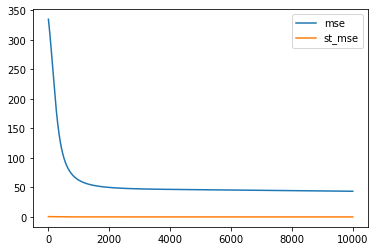

In [133]:
performance.plot()

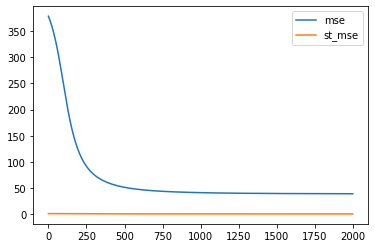

In [134]:
performance_2.plot()